# CNN

In this exercise you will code a CNN with Keras and test it on the well-known MNIST dataset.

In [1]:
# First import all important libraries for the network class
import numpy as np
# Import TensorFlow
import tensorflow as tf
# Import matplotlib so we can look at the data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
print('Using TensorFlow {:s} with {:d} GPUs'.format(tf.__version__,len(tf.config.experimental.list_physical_devices('GPU'))))

Using TensorFlow 2.4.1 with 0 GPUs


### Get the MNIST data

In [3]:
# Get the MNIST dataset from scikit learn
# Make sure you upgrade sklearn to version 0.20 (or higher)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
# Define the features and the labels
X, y = mnist['data'], np.asfarray(mnist['target'])

5.0

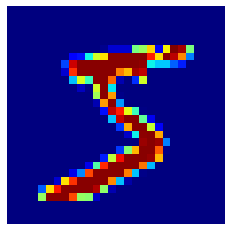

In [4]:
# Define some index, get the corresponding image, and plot it
some_index = 0
some_digit = X[some_index]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=cm.jet, interpolation='nearest')
plt.axis('off')
# Check the label
y[some_index]

In [35]:
shuffle_index = np.random.permutation(X.shape[0])
X, y = X[shuffle_index], y[shuffle_index]
# Define the training and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# Shuffle the training set to make sure training goes smooth
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
#Normalise
X_train_sca = X_train.copy()/255.*0.99+0.01
X_test_sca  = X_test.copy() /255.*0.99+0.01

### Design a CNN with Keras

Follow the LeNet-5 architecture with Convolutional and Average Pooling Layers.
Add regularization.
What activation function do you use in the network? Which one for the output layer?

In [41]:
# Free up RAM in case the model definition cells were run multiple times
tf.keras.backend.clear_session()

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(6, kernel_size=5, strides=1, padding="same", activation='relu', input_shape=(28,28,1)))
cnn.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding="valid"))
cnn.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding="valid"))
cnn.add(tf.keras.layers.Dropout(rate=0.2, seed=42))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(84, activation='relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.2, seed=42))
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         4

Compile the model. Use different loss functions and optimizers, including different HPs, like the learning rate.

In [42]:
sgd  = tf.keras.optimizers.SGD(lr=0.05)
adam = tf.keras.optimizers.Adam(lr=0.01)
cnn.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [43]:
# Transform label into array of categories using one-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat  = tf.keras.utils.to_categorical(y_test,  10)
print(y_train.shape, y_train_cat.shape)

(60000,) (60000, 10)


In [44]:
#Reshape the data into 2D data (or 3D with 1 color channel)
X_train_2d = X_train_sca.reshape(X_train_sca.shape[0],28,28,1)
X_test_2d  = X_test_sca.reshape(X_test_sca.shape[0],28,28,1)
print(X_train_sca.shape, X_train_2d.shape, X_test_2d.shape)

(60000, 784) (60000, 28, 28, 1) (10000, 28, 28, 1)


In [45]:
#Fit the model
cnn.fit(X_train_2d, y_train_cat, epochs=5, batch_size=100, verbose=1, validation_data=(X_test_2d,y_test_cat))

Epoch 1/5
600/600 [==============================] - 13s 20ms/step - loss: 0.4157 - accuracy: 0.8657 - val_loss: 0.0690 - val_accuracy: 0.9800
Epoch 2/5
600/600 [==============================] - 12s 20ms/step - loss: 0.0834 - accuracy: 0.9774 - val_loss: 0.0617 - val_accuracy: 0.9820
Epoch 3/5
600/600 [==============================] - 12s 20ms/step - loss: 0.0666 - accuracy: 0.9812 - val_loss: 0.0499 - val_accuracy: 0.9862
Epoch 4/5
600/600 [==============================] - 12s 20ms/step - loss: 0.0593 - accuracy: 0.9836 - val_loss: 0.0535 - val_accuracy: 0.9848
Epoch 5/5
600/600 [==============================] - 12s 21ms/step - loss: 0.0607 - accuracy: 0.9839 - val_loss: 0.0570 - val_accuracy: 0.9862


In [32]:
#Evaluate model and compute the score
score = cnn.evaluate(X_test_2d, y_test_cat,verbose=1)
print(score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0698 - accuracy: 0.9769
0.9768999814987183


In [47]:
# Compute the network prediction for the test sample
network_output  = cnn.predict(X_test_2d)
#y_test_cat_pred  = cnn.predict(X_test_2d)

True label: 3  - Predicted label: 8


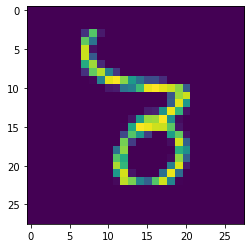

In [63]:
# Let's check the predictions for some examples
# Define some index, get the corresponding label
some_index = 203
target_label = np.int64(y_test[some_index])
# Query the network for the predicted label
predicted_label = np.argmax(network_output[some_index])
print('True label:',target_label,' - Predicted label:',predicted_label)
plt.imshow(X_test_2d[some_index].reshape(28,28))
plt.show()

In [62]:
i = 76
while (np.argmax(network_output[i]) == np.int64(y_test[i])):    
    print(i,np.int64(y_test[i]))
    i = i+1

76 0
77 4
78 6
79 6
80 5
81 9
82 1
83 6
84 3
85 4
86 5
87 1
88 8
89 3
90 3
91 1
92 0
93 6
94 7
95 3
96 0
97 1
98 1
99 3
100 8
101 9
102 3
103 9
104 9
105 3
106 8
107 0
108 8
109 8
110 9
111 8
112 7
113 2
114 4
115 8
116 8
117 5
118 8
119 8
120 0
121 0
122 9
123 1
124 3
125 7
126 9
127 0
128 9
129 8
130 1
131 6
132 9
133 4
134 2
135 3
136 7
137 2
138 3
139 7
140 5
141 7
142 3
143 3
144 2
145 2
146 7
147 4
148 6
149 7
150 8
151 8
152 4
153 9
154 5
155 8
156 3
157 6
158 2
159 7
160 1
161 5
162 5
163 1
164 9
165 1
166 5
167 1
168 2
169 1
170 7
171 4
172 4
173 0
174 2
175 2
176 6
177 5
178 7
179 1
180 4
181 7
182 9
183 9
184 7
185 4
186 3
187 5
188 1
189 3
190 9
191 2
192 8
193 3
194 2
195 7
196 4
197 7
198 1
199 1
200 8
201 9
202 9


### Some more things to do

Test if you can get a better performance. Some things to vary:

* Change the network architecture, e.g. MaxPooling, more layers, etc...
* Change the activation function. See: https://keras.io/activations/
* Change the optimizer. See: https://keras.io/optimizers/
* Change the loss function. See: https://keras.io/losses/
* Change the number of epochs and the batch size